<a href="https://colab.research.google.com/github/dlbkv/AI-Step/blob/master/module4/lab11_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [ ]:
import torch
import numpy as np

# Завдання 1

Перегляньте інформацію про доступні процесори, та виведіть про них інформацію

In [ ]:
print(torch.cuda.is_available())
if torch.cuda.is_available():
   print(torch.cuda.device_count())
   print(torch.cuda.get_device_name(0))

tensor = torch.tensor([12, 8, 13])
print(tensor.device)

False
cpu


# Завдання 2
Підключіть colab до процесора GPU, та знову виведіть інформацію про доступні процесори

In [ ]:
print(torch.cuda.is_available())
if torch.cuda.is_available():
   print(torch.cuda.device_count())
   print(torch.cuda.get_device_name(0))

tensor = torch.tensor([12, 8, 13])
print(tensor.device)

False
cpu


# Завдання 3
Створіть випадковий тензор розміру (2, 3). Виведіть інформацію про його:

* розмір
* тип даних
* процесор
* наявність градієнта

In [ ]:
tensor1 = torch.randn(2,3)
tensor1

tensor([[-1.3072, -1.0149, -0.5336],
        [-0.8789,  1.4308, -0.2932]])

In [ ]:
tensor1.shape

torch.Size([2, 3])

In [ ]:
tensor1.dtype

torch.float32

In [ ]:
tensor1.device

device(type='cpu')

In [ ]:
tensor1.requires_grad

False

# Завдання 4

Створіть 2 тензора розміру 100. Використовуючи лише модуль `torch` обрахуйте середьню абсолютну похибку(mae) між ними. Виведіть результат як число

In [ ]:
tensor2 = torch.rand(100)
tensor3 = torch.rand(100)

In [ ]:
mae = torch.mean(torch.abs(tensor2 - tensor3))

In [ ]:
mae.item()

0.31613922119140625

# Завдання 5

Створіть 3 випадкових тензора з розмірами:
* 32х28х28
* 16х28х28
* 64х28х28

Об'єднайте їх по першій розмірності. Результат має мати розмір 128х28х28

In [ ]:
tensor4 = torch.rand((32,28,28))
tensor5 = torch.rand((16,28,28))
tensor6 = torch.rand((64,28,28))

In [ ]:
torch_cat = torch.cat((tensor4, tensor5, tensor6), dim=0)

# Завдання 6
Застосуйте метод градієнтного спуску для функції

In [ ]:
def f(x):
  return x**2/3 + torch.sin(torch.pi*x)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

x = torch.tensor(1., requires_grad=True)
learning_rate = 1e-2

for n in range(1000):
  loss = f(x)
  loss.backward()

  if n % 100 == 0:
      print(f'loss={loss.item()}')

  with torch.no_grad():
    x -= learning_rate * x.grad
    x.grad = None

#loss меньше, но на графике он рисуется выше чем с начальным значением 0 с графиком приведенном ниже

loss=0.33333325386047363
loss=-0.2977929711341858
loss=-0.297792911529541
loss=-0.297792911529541
loss=-0.297792911529541
loss=-0.297792911529541
loss=-0.297792911529541
loss=-0.297792911529541
loss=-0.297792911529541
loss=-0.297792911529541


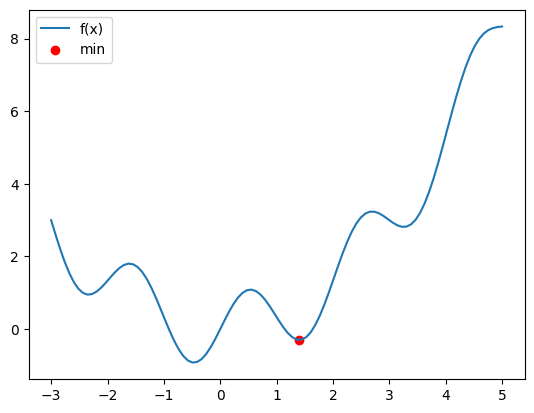

In [ ]:
import matplotlib.pyplot as plt

xs = torch.linspace(-3, 5, 100)
plt.plot(xs.cpu(), f(xs).cpu(), label='f(x)')
plt.scatter(x.item(), f(x).item(), c='red', label='min')
plt.legend()

In [ ]:
x = torch.tensor(0., requires_grad=True)
learning_rate = 1e-2

for n in range(1000):
  loss = f(x)
  loss.backward()

  if n % 100 == 0:
      print(f'loss={loss.item()}')

  with torch.no_grad():
    x -= learning_rate * x.grad
    x.grad = None

loss=0.0
loss=-0.9219435453414917
loss=-0.9219435453414917
loss=-0.9219435453414917
loss=-0.9219435453414917
loss=-0.9219435453414917
loss=-0.9219435453414917
loss=-0.9219435453414917
loss=-0.9219435453414917
loss=-0.9219435453414917


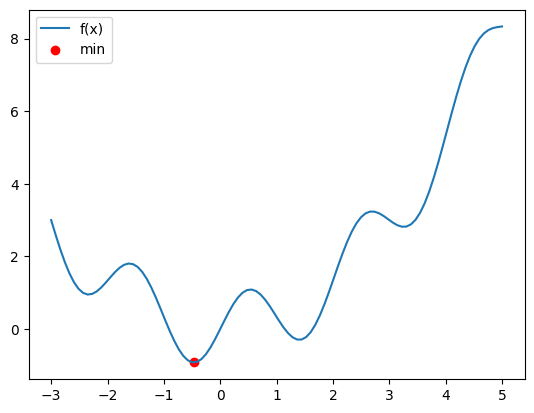

In [ ]:
import matplotlib.pyplot as plt

xs = torch.linspace(-3, 5, 100)
plt.plot(xs.cpu(), f(xs).cpu(), label='f(x)')
plt.scatter(x.item(), f(x).item(), c='red', label='min')
plt.legend()

# Завдання 7
Застосуйте метод градієнтного спуску для функції. Мінімум функції рівний 0

In [ ]:
def f1(x, y):
  # функція Швефеля
  return  418.9829*2 - x*torch.sin(x.abs().sqrt()) - y*torch.sin(y.abs().sqrt())

def f2(x, y):
  # трьохгорбна функція
  return 2*x**2  - 1.05*x**4 + 1/6*x**6 + x*y  + y**2

def f3(x, y):
  # функція птах
  return 106.7645 + torch.sin(x)*torch.exp((1-torch.cos(y))**2) + torch.cos(y)*torch.exp((1-torch.sin(x))**2) + (x-y)**2

In [ ]:
x = torch.tensor(0., requires_grad=True)
y = torch.tensor(1., requires_grad=True)
learning_rate = 1e-3

for n in range(1000):
  loss = f2(x, y)
  loss.backward()

  if n % 100 == 0:
      print(f'loss={loss.item()}')

  with torch.no_grad():
    x -= learning_rate * x.grad
    y -= learning_rate * y.grad
    x.grad = None
    y.grad = None

loss=1.0
loss=0.6260854601860046
loss=0.41356462240219116
loss=0.2836360037326813
loss=0.19940337538719177
loss=0.14237144589424133
loss=0.10258953273296356
loss=0.07430898398160934
loss=0.05397564172744751
loss=0.039262574166059494
